## svm machine learning model for trend recognition

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the data
df = pd.read_csv('extract_trend.csv')

### 1. Data Preparation

In [12]:
# Prepare the feature columns and target column
feature_cols = ['Rating', 'Sentiment', 'Followers', 'NormalizedRating','Number_of_Mentions']
X = df[feature_cols]
y = df['is_trend']

### 2. Data Splitting

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Model Training

In [14]:
# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

### 4. Model Evaluation

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        59
           1       0.78      0.50      0.61        28

    accuracy                           0.79        87
   macro avg       0.79      0.72      0.73        87
weighted avg       0.79      0.79      0.78        87



In [16]:
# Calculate and print the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)

[[55  4]
 [14 14]]


### 5. Confusion Matrix Plotting

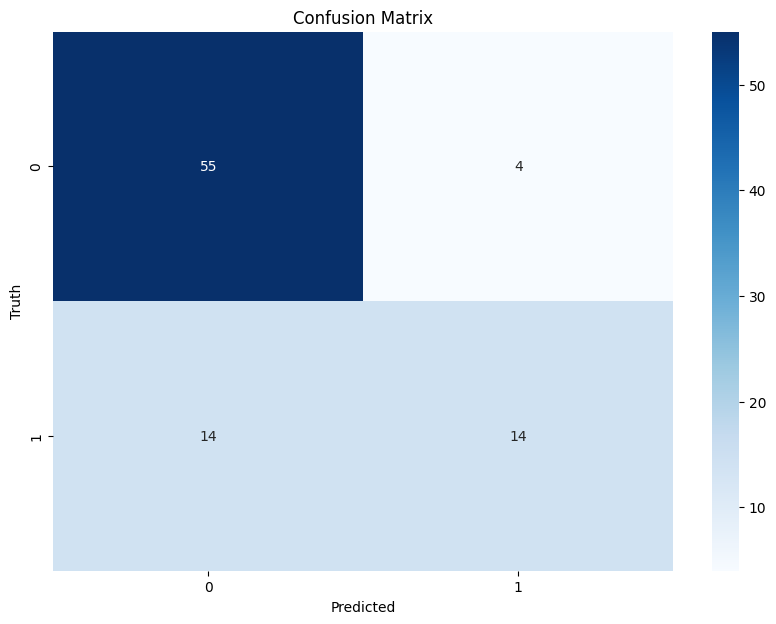

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [23]:
import joblib

# Save the model
joblib.dump(model, 'svm_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']